In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import missingno as no
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
df = pd.read_csv("dataR2.csv")

In [3]:
#checkrows and columns in the data set
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [4]:
df.tail()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
111,45,26.85,92,3.33,0.755688,54.68,12.10,10.96,268.23,2
112,62,26.84,100,4.53,1.117400,12.45,21.42,7.32,330.16,2
113,65,32.05,97,5.73,1.370998,61.48,22.54,10.33,314.05,2
114,72,25.59,82,2.82,0.570392,24.96,33.75,3.27,392.46,2
115,86,27.18,138,19.91,6.777364,90.28,14.11,4.35,90.09,2


In [5]:
df.shape

(116, 10)

In [6]:
print(df.dtypes)

Age                 int64
BMI               float64
Glucose             int64
Insulin           float64
HOMA              float64
Leptin            float64
Adiponectin       float64
Resistin          float64
MCP.1             float64
Classification      int64
dtype: object


 Ckech the miss data: 0      0
1      0
2      0
3      0
4      0
      ..
111    0
112    0
113    0
114    0
115    0
Length: 116, dtype: int64
Axes(0.125,0.11;0.775x0.77)


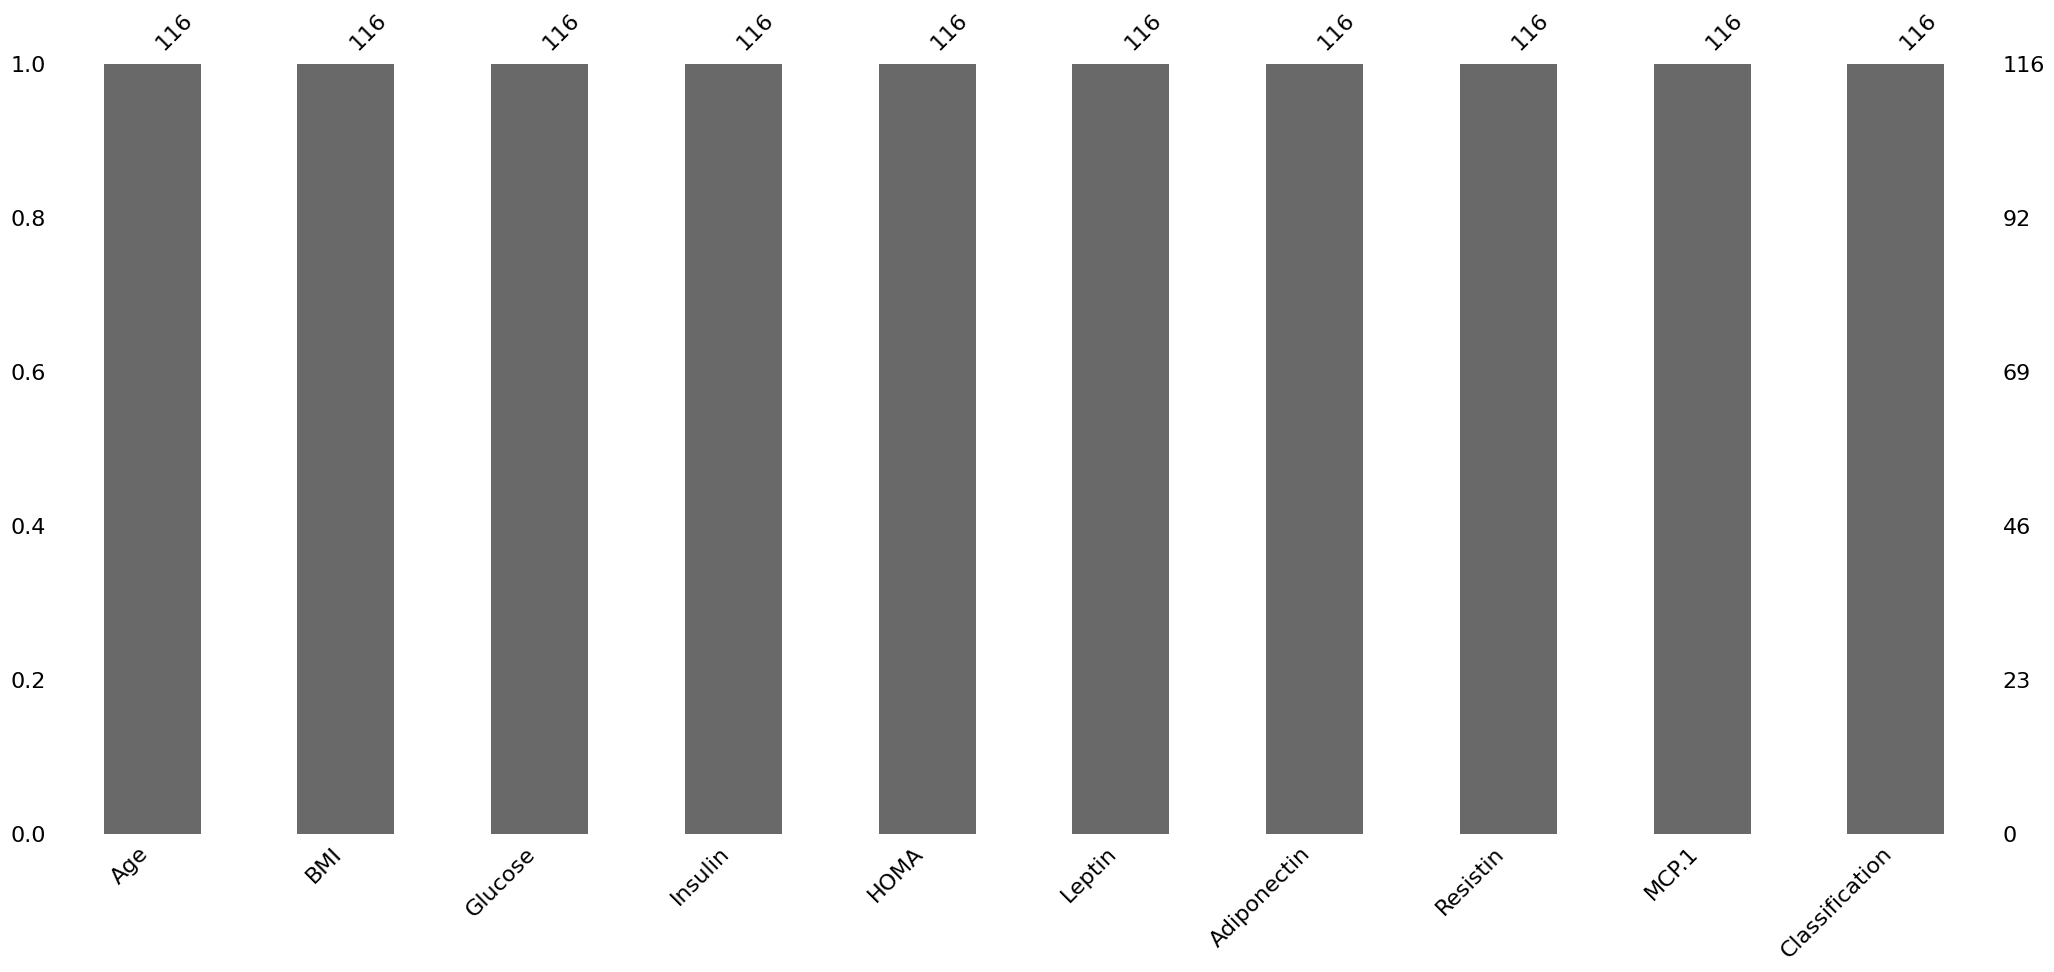

In [7]:
print(f' Ckech the miss data:',df.isna().sum(axis=1))
print(no.bar(df))


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [9]:
df.quantile()

Age                56.000000
BMI                27.662416
Glucose            92.000000
Insulin             5.924500
HOMA                1.380939
Leptin             20.271000
Adiponectin         8.352692
Resistin           10.827740
MCP.1             471.322500
Classification      2.000000
Name: 0.5, dtype: float64

In [10]:
df.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


In [19]:
#Get the correlation of the columns
df.corr()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
Age,1.000000,0.008530,0.230106,0.032495,0.127033,0.102626,-0.219813,0.002742,0.013462,-0.043555
BMI,0.008530,1.000000,0.138845,0.145295,0.114480,0.569593,-0.302735,0.195350,0.224038,-0.132586
Glucose,0.230106,0.138845,1.000000,0.504653,0.696212,0.305080,-0.122121,0.291327,0.264879,0.384315
Insulin,0.032495,0.145295,0.504653,1.000000,0.932198,0.301462,-0.031296,0.146731,0.174356,0.276804
HOMA,0.127033,0.114480,0.696212,0.932198,1.000000,0.327210,-0.056337,0.231101,0.259529,0.284012
Leptin,0.102626,0.569593,0.305080,0.301462,0.327210,1.000000,-0.095389,0.256234,0.014009,-0.001078
Adiponectin,-0.219813,-0.302735,-0.122121,-0.031296,-0.056337,-0.095389,1.000000,-0.252363,-0.200694,-0.019490
Resistin,0.002742,0.195350,0.291327,0.146731,0.231101,0.256234,-0.252363,1.000000,0.366474,0.227310
MCP.1,0.013462,0.224038,0.264879,0.174356,0.259529,0.014009,-0.200694,0.366474,1.000000,0.091381
Classification,-0.043555,-0.132586,0.384315,0.276804,0.284012,-0.001078,-0.019490,0.227310,0.091381,1.000000


In [20]:
df.columns

Index(['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin',
       'Resistin', 'MCP.1', 'Classification'],
      dtype='object')

In [21]:
# Correlation ecah one feature
df[['Classification','Age']].corr()

,Classification,Age
Classification,1.000000,-0.043555
Age,-0.043555,1.000000


In [22]:
df[['Classification','BMI']].corr()

,Classification,BMI
Classification,1.000000,-0.132586
BMI,-0.132586,1.000000


In [23]:
df[['Classification','Glucose']].corr()

,Classification,Glucose
Classification,1.000000,0.384315
Glucose,0.384315,1.000000


In [24]:
df[['Classification','Insulin']].corr()

,Classification,Insulin
Classification,1.000000,0.276804
Insulin,0.276804,1.000000


In [25]:
df[['Classification','HOMA']].corr()

,Classification,HOMA
Classification,1.000000,0.284012
HOMA,0.284012,1.000000


In [26]:
df[['Classification','Leptin']].corr()

,Classification,Leptin
Classification,1.000000,-0.001078
Leptin,-0.001078,1.000000


In [27]:
df[['Classification','Adiponectin']].corr()

,Classification,Adiponectin
Classification,1.00000,-0.01949
Adiponectin,-0.01949,1.00000


In [28]:
df[['Classification','Resistin']].corr()

,Classification,Resistin
Classification,1.00000,0.22731
Resistin,0.22731,1.00000


In [29]:
df[['Classification','MCP.1']].corr()

,Classification,MCP.1
Classification,1.000000,0.091381
MCP.1,0.091381,1.000000


In [30]:
df['Classification'].value_counts()

df['Classification'].value_counts() * 100 / len(df)


sns.countplot(x='Classification', data=df, palette='viridis')

<Axes: xlabel='Classification', ylabel='count'>

In [31]:
df.columns

Index(['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin',
       'Resistin', 'MCP.1', 'Classification'],
      dtype='object')

In [32]:
#Select the data into independent 'X' and dependent 'Y' variables
X = df.iloc[:, 0:9].values
Y = df.iloc[:,9].values

In [33]:
## If anyone to see the data with features (X)
all_columns=['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin','Resistin', 'MCP.1']

X = pd.DataFrame(X,columns=all_columns[0:9])
all_columns[0:9]
X.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48.0,23.500000,70.0,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83.0,20.690495,92.0,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82.0,23.124670,91.0,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68.0,21.367521,77.0,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86.0,21.111111,92.0,3.549,0.805386,6.6994,4.819240,10.57635,773.920


In [34]:
Y[:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [35]:
#Split the dataset into 80% Training set and 20% Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [36]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train[:5]

array([[-0.90580006, -0.60223851,  0.39996142,  5.41266386,  3.97788424,
        -0.48294549,  1.01615946, -0.73302693, -0.83359765],
       [-1.1590937 , -0.01445999,  0.26128133, -0.79254154, -0.59226514,
        -0.67908362, -0.50242597,  0.88574816, -0.67899565],
       [-0.84247665, -0.17399633, -0.24721234, -0.69308636, -0.54932947,
         1.38357642,  0.36413531, -0.29126418, -0.75855465],
       [ 0.9939022 ,  0.19135671, -0.43211912, -0.72830546, -0.58107469,
         0.17960335, -0.36087967,  0.28699465,  0.21358775],
       [ 0.93057879, -1.15834447, -0.01607885, -0.69087133, -0.53504167,
        -1.18263566,  0.08029698, -0.65683654, -1.17843428]])

In [37]:
#All the models
def models(X_train,Y_train):

  #Using Logistic Regression Algorithm to the Training Set
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)

  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #Using SVC method of svm class to use Support Vector Machine Algorithm
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state =0)
  svc_lin.fit(X_train, Y_train)

  #Using SVC method of svm class to use Kernel SVM Algorithm
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree =DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 10)
  forest.fit(X_train, Y_train)




 #Using xgboostr method of ensemble class to use xgboostClassification algorithm
  import xgboost as xgb
  x_gb= xgb.XGBClassifier(objective="binary:logistic", n_estimators=20, random_state=42, eval_metric=["auc", "error", "error@0.6"])
  x_gb.fit(X_train, Y_train)




  #print model accuracy on the training data.
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
  print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
  print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
  print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
  print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  print('[7]xgboost Classifier Training Accuracy:', x_gb.score(X_train, Y_train))
  return log, knn, svc_lin, svc_rbf, gauss, tree, forest ,x_gb

model = models(X_train,Y_train)

[0]Logistic Regression Training Accuracy: 0.7608695652173914
[1]K Nearest Neighbor Training Accuracy: 0.8260869565217391
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.782608695652174
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.8695652173913043
[4]Gaussian Naive Bayes Training Accuracy: 0.6413043478260869
[5]Decision Tree Classifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 0.9891304347826086
[7]xgboost Classifier Training Accuracy: 1.0


In [47]:
import pickle

# Create and train the SVM model
svc_rbf = SVC(kernel='rbf', random_state=0)
svc_rbf.fit(X_train, Y_train)

# Save the trained model to a file using pickle
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(svc_rbf, file)
